# __PCA__

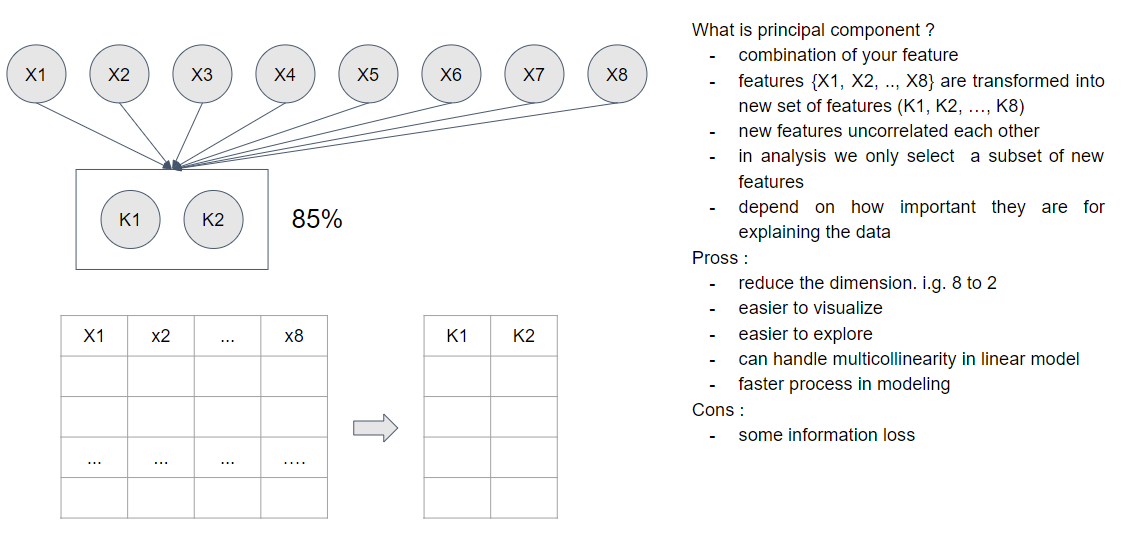

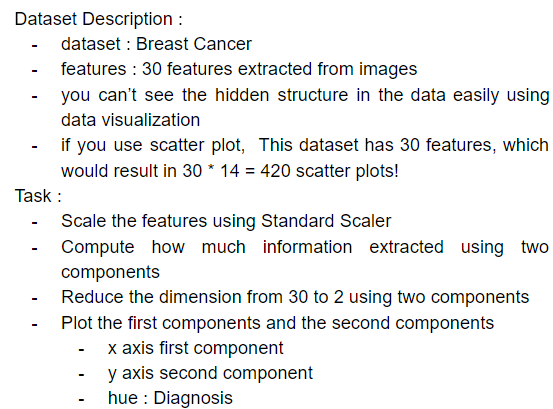

In [4]:
#1. Import Library

import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

In [6]:
#2. Load dataset

cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
cancer_df['diagnosis'] = cancer['target']

cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Ini masih data leakage, jangan ditiru.
Yang di pca hanya di train - validation saja, test tidak

In [7]:
#2. Melakukan scalling pada data x saja

scaler = StandardScaler()
scaler.fit(cancer_df.drop('diagnosis', axis = 1))

X_scaled = scaler.transform(cancer_df.drop('diagnosis', axis = 1))
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [9]:
#Melihat dimensi x_scaled

X_scaled.shape

(569, 30)

In [10]:
#3. import library

from sklearn.decomposition import PCA


> ### __Information Extraction (PCA = 30)__

In [11]:
#4. Melakukan PCA untuk semua feature (30 component)

pca = PCA(n_components = 30)
pca.fit(X_scaled)

x_pca = pca.transform(X_scaled)

In [12]:
#mencari explained variance

pca.explained_variance_

array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
       1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
       4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
       2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
       5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 3.12142606e-02,
       3.00256631e-02, 2.74877113e-02, 2.43836914e-02, 1.80867940e-02,
       1.55085271e-02, 8.19203712e-03, 6.91261258e-03, 1.59213600e-03,
       7.50121413e-04, 1.33279057e-04])

In [13]:
#jika mengambil semua feature

np.sum(pca.explained_variance_ratio_)
#dijumlahkan semua, rationya menjadi 1

1.0

In [14]:
#Jika mengambil 2 feature saja 

np.sum(pca.explained_variance_ratio_[:2])
#hanya dapat 0,63 saja

0.6324320765155941

> ### __REDUCING DIMENSION (30 T0 2)__

In [20]:
#4. Melakukan PCA untuk semua feature (2 component)

pca2 = PCA(n_components = 2)
pca2.fit(X_scaled)

X_pca_2 = pca2.transform(X_scaled)

In [21]:
#Mengecek perbandingan shape awal dan setelah reduction

print('Original Shape: {}'. format(str(X_scaled.shape)))
print('Reduced Shape: {}'. format(str(X_pca_2.shape)))

Original Shape: (569, 30)
Reduced Shape: (569, 2)


In [22]:
#Jika mengambil 2 feature saja 

np.sum(pca.explained_variance_ratio_[:2])
#hanya dapat 0,63 saja

0.6324320765155941

In [24]:
#Untuk melihat semua komponen

pca2.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [25]:
#Untuk melihat nilai pc1

pca2.components_[0]

array([0.21890244, 0.10372458, 0.22753729, 0.22099499, 0.14258969,
       0.23928535, 0.25840048, 0.26085376, 0.13816696, 0.06436335,
       0.20597878, 0.01742803, 0.21132592, 0.20286964, 0.01453145,
       0.17039345, 0.15358979, 0.1834174 , 0.04249842, 0.10256832,
       0.22799663, 0.10446933, 0.23663968, 0.22487053, 0.12795256,
       0.21009588, 0.22876753, 0.25088597, 0.12290456, 0.13178394])

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


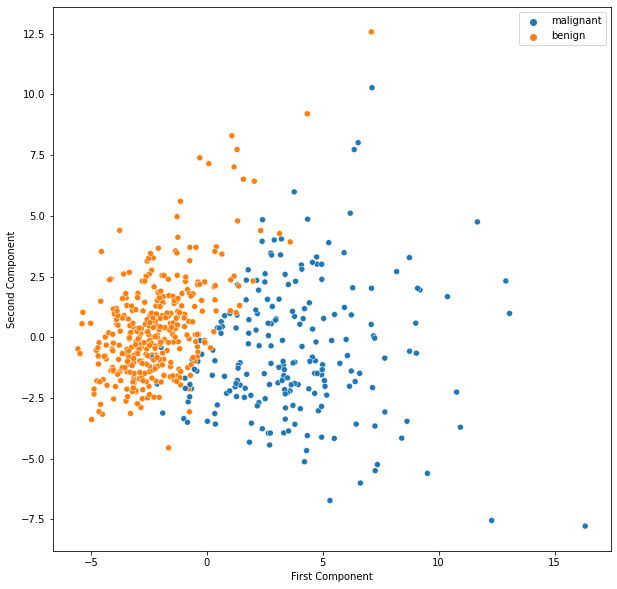

In [26]:
#Membuat scatter plot

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.scatterplot(X_pca_2[:,0], X_pca_2[:,1], hue = np.where(cancer_df['diagnosis']==1, 'benign', 'malignant'))

plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.show()

Result :
- Information extracted from 2 component 63.24 % 
- We reduce the dimension from 30 to 2 and the lost information is 36.76% but you can see that those two features can separate benign and malignant quiet well
- this also means that you can see hidden structure within the data
- malignant points are more spread than benign point


Untuk yg malignent, bisa dijelaskan di component 1. Semakin kecil nilai component 1, semakin kecil peluang malignent.
<br> kita gatau component1 berasal dari kolom mana aja

# NGAPAIN NIH

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
#

pc_df = pd.DataFrame(X_pca_2, columns = ['PCA1', 'PCA2'])
pc_df['target'] = cancer_df['diagnosis']
pc_df.head()

,PCA1,PCA2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0


In [30]:
#2. Menentukan variabel dependent dan idependent

X = pc_df.drop('target', axis = 1)
y = pc_df['target']

In [31]:
#3. Melakukan data splitting

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = .2, random_state = 1)

In [32]:
#4. Membuat model knn

knn = KNeighborsClassifier(n_neighbors =3).fit(X_train, y_train)

In [34]:
#5. Membuat prediksi

y_pred = knn.predict(X_test)


array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1])

In [36]:
#6. Melakukan model performance 

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



__Lihat nilai f1__

__INFO:__

<br> Untuk mencegah data leakage pake pipeline,
<br> untuk melihat data leakage, pake cv